In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\USER\AppData\Local\Temp\ipykernel_36280\265554930.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df = pd.read_csv('C:/Users/USER/Downloads/DATA/heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
df['target'].value_counts()

target
1    165
0    138
Name: count, dtype: int64

In [4]:
df['target'].unique()

array([1, 0], dtype=int64)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

<Axes: xlabel='target', ylabel='count'>

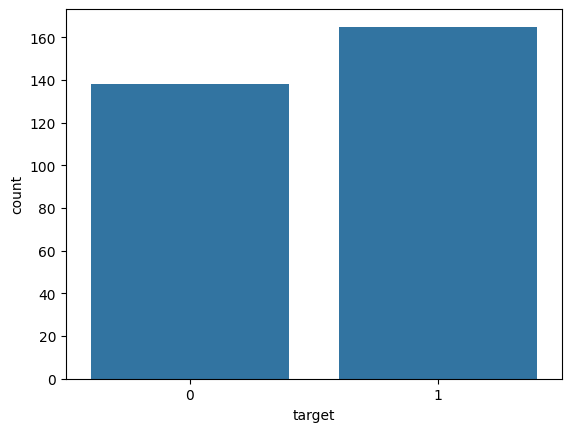

In [7]:
sns.countplot(df, x='target')

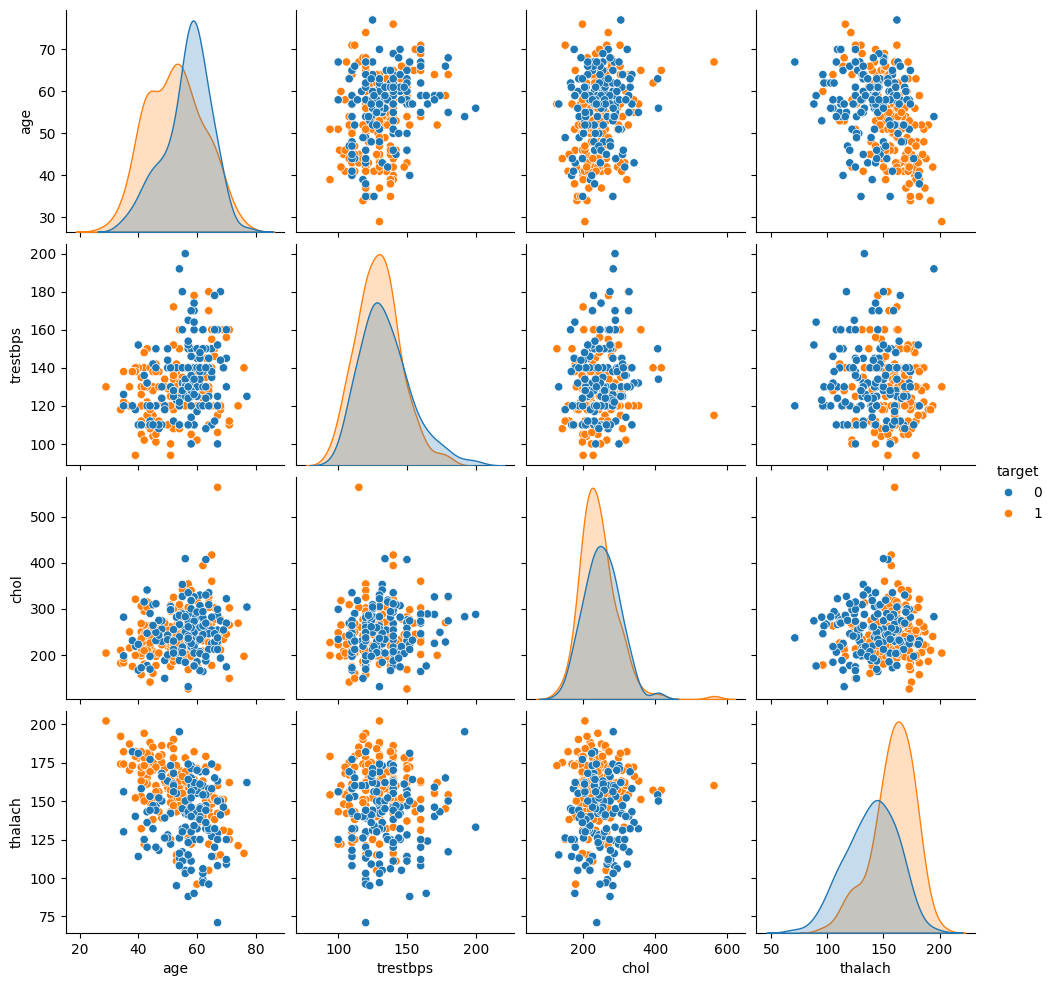

In [8]:
sns.pairplot(df[['age', 'trestbps', 'chol', 'thalach', 'target']], hue='target')

<Axes: >

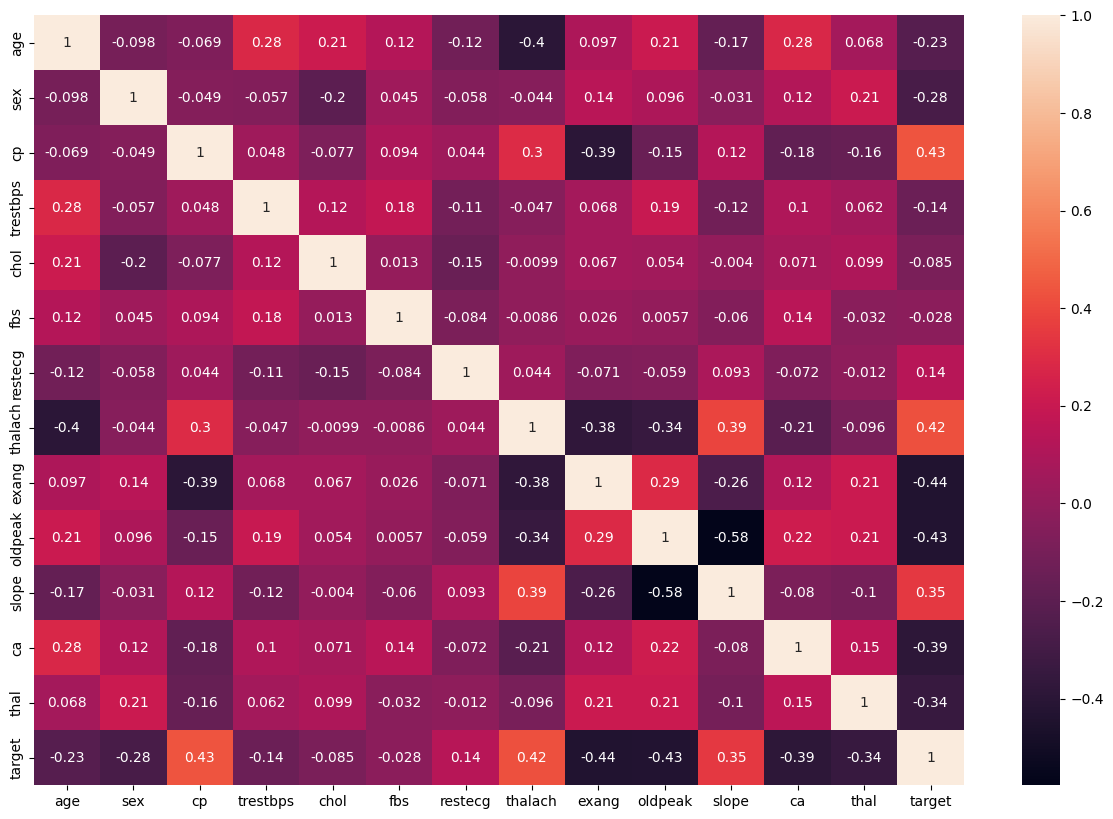

In [15]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True)

In [16]:
X = df.drop('target', axis=1)
y = df['target']

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [18]:
from sklearn.linear_model import LogisticRegressionCV

log_model = LogisticRegressionCV()
log_model.fit(scaled_X_train, y_train)

LogisticRegressionCV()

In [19]:
log_model.Cs_

array([1.00000000e-04, 7.74263683e-04, 5.99484250e-03, 4.64158883e-02,
       3.59381366e-01, 2.78255940e+00, 2.15443469e+01, 1.66810054e+02,
       1.29154967e+03, 1.00000000e+04])

In [20]:
log_model.C_

array([0.04641589])

In [24]:
log_model.get_params()

{'Cs': 10,
 'class_weight': None,
 'cv': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1.0,
 'l1_ratios': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'refit': True,
 'scoring': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0}

In [25]:
log_model.coef_

array([[-0.09624234, -0.39455733,  0.53541263, -0.13845013, -0.0882132 ,
         0.02495565,  0.08083019,  0.29896895, -0.33440044, -0.35252781,
         0.25100118, -0.49732614, -0.37440968]])

In [26]:
df.head(1)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1


In [27]:
coefs = pd.Series(index=X.columns, data=log_model.coef_[0])

In [28]:
coefs

age        -0.096242
sex        -0.394557
cp          0.535413
trestbps   -0.138450
chol       -0.088213
fbs         0.024956
restecg     0.080830
thalach     0.298969
exang      -0.334400
oldpeak    -0.352528
slope       0.251001
ca         -0.497326
thal       -0.374410
dtype: float64

<Axes: xlabel='None'>

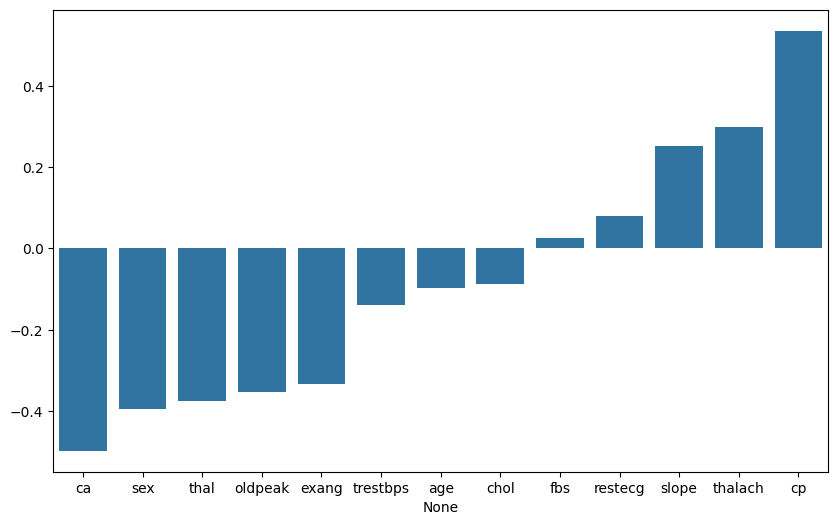

In [29]:
coefs = coefs.sort_values()
plt.figure(figsize=(10,6))
sns.barplot(x=coefs.index, y=coefs.values)

In [31]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
y_pred = log_model.predict(scaled_X_test)

In [32]:
confusion_matrix(y_test, y_pred)

array([[12,  3],
       [ 2, 14]], dtype=int64)

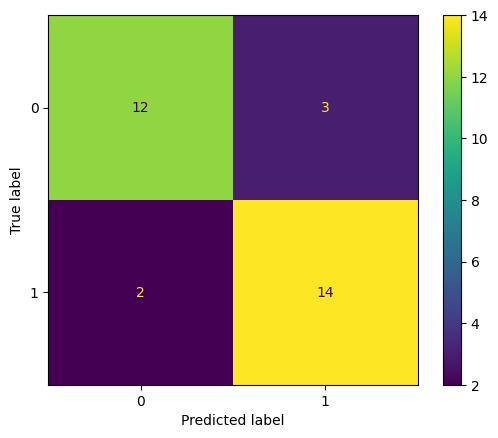

In [33]:
ConfusionMatrixDisplay.from_estimator(log_model, scaled_X_test, y_test)

In [34]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.80      0.83        15
           1       0.82      0.88      0.85        16

    accuracy                           0.84        31
   macro avg       0.84      0.84      0.84        31
weighted avg       0.84      0.84      0.84        31



In [35]:
from sklearn.metrics import PrecisionRecallDisplay, RocCurveDisplay

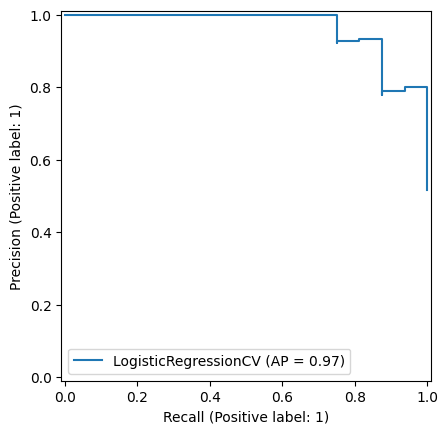

In [36]:
PrecisionRecallDisplay.from_estimator(log_model, scaled_X_test, y_test)

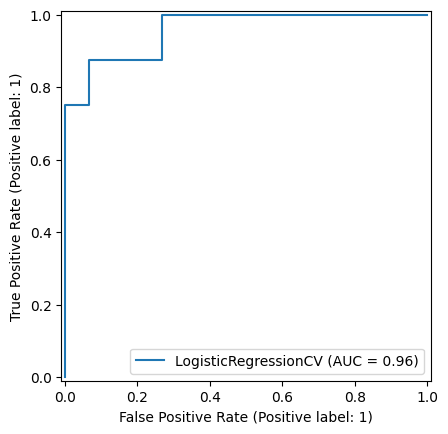

In [37]:
RocCurveDisplay.from_estimator(log_model, scaled_X_test, y_test)